In [1]:
import pandas as pd 
import numpy as np
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Data/power-data/save_data/train_process.csv")
test = pd.read_csv("Data/power-data/save_data/test_process.csv")
train = train.drop(['Unnamed: 0', 'atmospheric_temperature(°C)'], axis=1)
test = test.drop(['Unnamed: 0', 'atmospheric_temperature(°C)'], axis=1)

In [3]:
X = train.drop(['windmill_generated_power(kW/h)', ], axis=1).values
y = train['windmill_generated_power(kW/h)'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [6]:
score = xgbr.score(X_train, y_train)
print("Training Score:", score)

Training Score: 0.9870684614236074


In [7]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error Model:", mse)

Mean Square Error Model: 0.3118028712940171


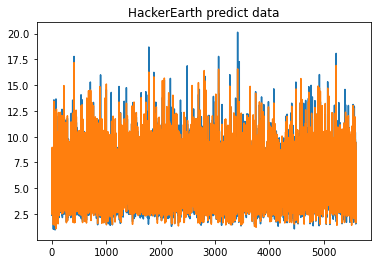

In [8]:
# visualize
ax = range(len(y_test))
plt.plot(ax, y_test, label='Dữ liệu ban đầu')
plt.plot(ax, y_pred, label='Dữ liệu dự đoán')
plt.title("HackerEarth predict data")
plt.show()

Predict testing dataset and demosubmit

In [16]:
train.shape

(27993, 22)

In [17]:
test.shape

(12086, 22)

In [18]:
test = test.drop(['windmill_generated_power(kW/h)'], axis=1).values

In [19]:
test_pred = xgbr.predict(test)

In [20]:
test_pred

array([ 2.5039644,  2.4491806,  3.22532  , ...,  5.1764503,  5.445012 ,
       11.127489 ], dtype=float32)

In [21]:
sub = pd.read_csv("Data/power-data/save_data/sub_pre.csv")
sub.head()

,Unnamed: 0,tracking_id,datetime
0,0,WM_19817,2019-04-17 08:53:20
1,1,WM_18723,2019-03-30 07:43:20
2,2,WM_34552,2019-08-10 11:33:20
3,3,WM_28570,2019-06-26 03:53:20
4,4,WM_36934,2019-08-27 16:43:20


In [22]:
sub = sub.drop(['Unnamed: 0'], axis=1)

In [23]:
sub["windmill_generated_power(kW/h)"] = test_pred

In [24]:
sub

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.503964
1,WM_18723,2019-03-30 07:43:20,2.449181
2,WM_34552,2019-08-10 11:33:20,3.225320
3,WM_28570,2019-06-26 03:53:20,6.631602
4,WM_36934,2019-08-27 16:43:20,3.481721
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.768751
12082,WM_1630,2018-11-12 17:33:20,3.281682
12083,WM_24703,2019-05-27 11:53:20,5.176450
12084,WM_22893,2019-05-13 21:53:20,5.445012


In [25]:
#sub.to_csv("Data/power-data/save_data/submit_1.csv")